<a href="https://colab.research.google.com/github/lucianosilva-github/visaocomputacional/blob/master/Aula%2019/Visa%CC%83o_Computacional_Aula_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VISÃO COMPUTACIONAL - AULA 17**

**Objetivos da aula:**

*   conhecer os fundamentos de Visão Estéreo e Geometria Epipolar
*   praticar com cálculo da matriz fundamental
*   praticar com cálculo da matriz essencial
*   reconstruir as matrizes de rotação e translação de câmera


### <b> GEOMETRIA EPIPOLAR </b>

Quando trabalhamos com o modelo de câmera pinhole, perdemos uma noção importante: profundidade. Uma das maneiras para se perceber profundidade é com o uso de câmeras, conhecida como <b> Visão Estéreo</b>. 

<img src="https://opencv24-python-tutorials.readthedocs.io/en/latest/_images/epipolar.jpg"> </img>

Usando somente a câmera de centro <i>O</i>, temos várias possibilidades de pontos X que podem ser projetados no ponto x da imagem. Porém, se consideramos uma outra câmera <i>O'</i>, os pontos x' correspondentes aos pontos x levam a um único ponto X possível no espaço, que pode ser calculado através da intersecção das semiretas <i>Ox</i> e <i>O'x'</i>. 

As linhas <i>l</i> e <i>l'</i> são chamadas <b>linhas epipolares</b> e contém pontos correspondentes em projeção nas duas imagens, conhecidos como <b>epipolos</b>. O plano <i>OXO'</i> é chamado de <b>plano epipolar</b>.

Conhecidos os centros <i>O</i>, <i>O'</i> e alguns pares de epipolos <i>(e,e')</i> (normalmente, dependemos da técnica utilizada, usamos oito epipolos ou mais), é possível reconstruir as matrizes de projeção das câmeras <i>O</i> e <i>O'</i>. Esta determinação de matrizes é realizada com o auxílio da <b>Geometria Epipolar</b>.

Para simplificar o nosso modelo de duas câmeras, vamos considerar duas câmeras com os mesmos parâmetros intrínsecos (distância focal, tamaho do plano de projeção, dentre outros) e posicionadas diferentemente utilizando uma translação e uma rotação.

<img src="https://opencv24-python-tutorials.readthedocs.io/en/latest/_images/essential_matrix.jpg"> </img>

Vamos designar as matrizes das câmeras de <i>K</i> e <i>K'</i>, associadas aos centros <i>O</i> e <i>O'</i>, respectivamente. Para determinar estas duas matrizes, vamos duas outras matrizes: <b> Matriz Essencial (E)</b> e a <b> Matriz Fundamental(F) </b>.

A matriz essencial E contém informações sobre a translação T e a rotação R da câmera <i>O'</i>, em relação à câmera <i>O</i>. A matriz fundamental F permite projetar uma linha epipolar de imagem na linha epipolar correspodnente na outra imagem.



### <b> MATRIZ FUNDAMENTAL F </b>

A matriz fundamental F pode ser obtida resolvendo o sistema de equações lineares abaixo:

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6ab25460ff5b12e37a92d4ad41487802476c69be"> </img>
</center>

A matriz F é uma matrix 3x3. Assim, 8 equações são suficientes para determiná-la completamente. Estas equações são obtidas através de 8 pares de epipolos <i>(e,e')</i> correspondentes nas duas imagens.





Imagem Esquerda


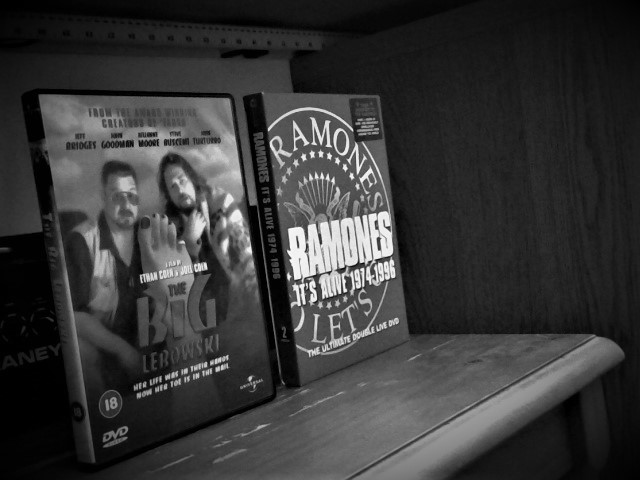

Imagem Direita


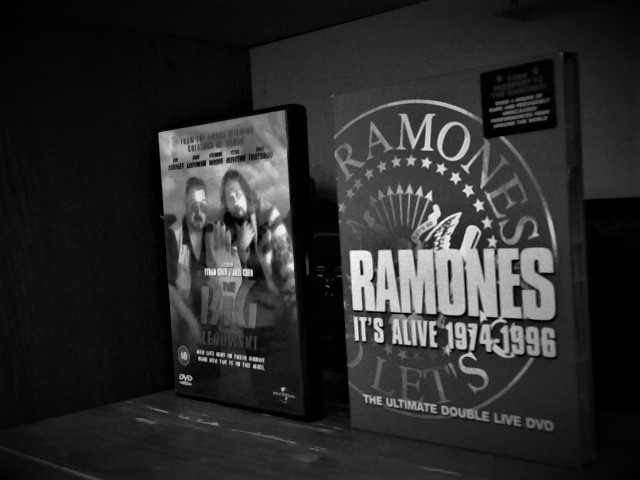

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img1 = cv.imread('image_l.jpg',0)
print("Imagem Esquerda")
cv2_imshow(img1)
img2 = cv.imread('image_r.jpg',0)
print("Imagem Direita")
cv2_imshow(img2)

Todas as ocorrências:


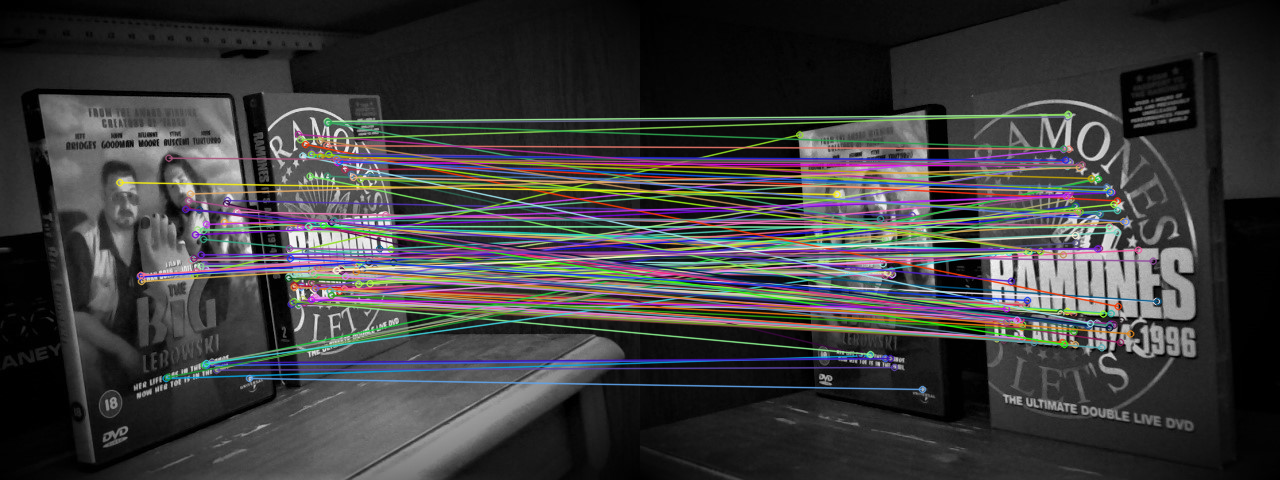

In [ ]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)
print("Todas as ocorrências:")
cv2_imshow(img3)

Somente as oito primeiras correspondências:
(336.0, 270.0) <--> (483.0, 221.0)
(312.0, 152.0) <--> (459.0, 179.0)
(289.0, 229.0) <--> (364.0, 340.0)
(370.0, 174.0) <--> (469.0, 330.0)
(356.0, 270.0) <--> (445.0, 169.0)
(315.0, 144.0) <--> (465.0, 348.0)
(343.0, 168.0) <--> (236.0, 363.0)
(341.0, 267.0) <--> (438.0, 222.0)


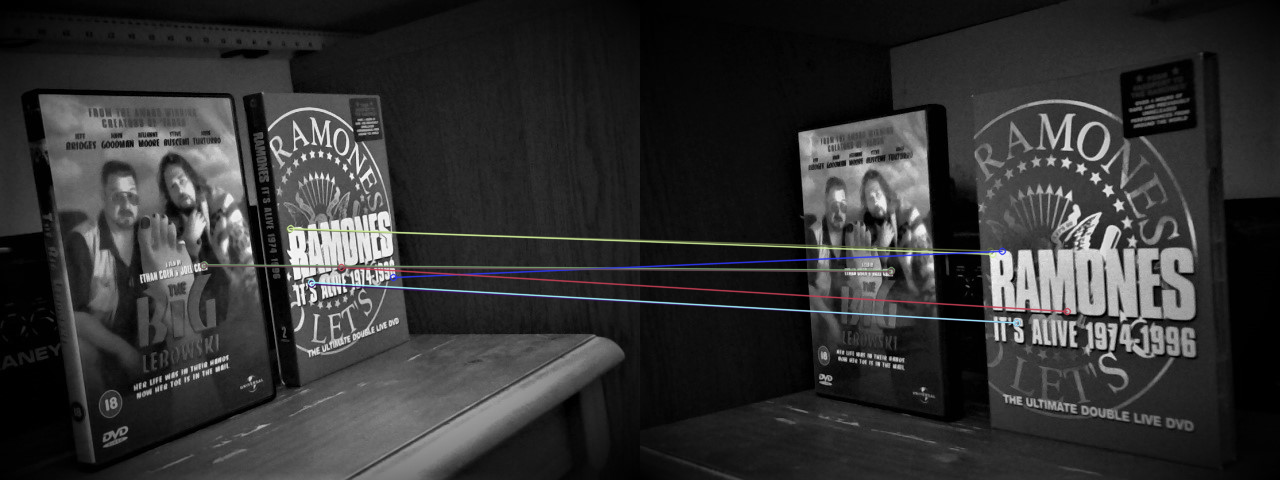

In [ ]:
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:8],None, flags=2)
print("Somente as oito primeiras correspondências:")
for i in range(8):
  print(kp1[i].pt,"<-->",kp2[i].pt)
cv2_imshow(img3)

In [ ]:
x=[]
xl=[]
for i in range(8):
  x.append(kp1[i].pt)
  xl.append(kp2[i].pt)
F, _= cv.findFundamentalMat(np.array(x, dtype='float32'),np.array(xl, dtype='float32'),cv.FM_LMEDS)
print(F)

[[ 2.14649910e-05  2.94241162e-06 -7.15732839e-03]
 [-1.69404810e-05  2.21940435e-05  1.89049376e-03]
 [ 6.21101883e-04 -7.78931967e-03  1.00000000e+00]]


#### <b> EXERCÍCIO </b>

Verifique se é possível obter a matriz fundamental com um número menor de correspondências, isto é, com um número de amostras menor que 8.

In [ ]:
#teste seu código aqui

#### <b> EXERCÍCIO </b>

Verifique se é possível obter a matriz fundamental com um número maior de correspondências, isto é, com um número de amostras maior que 8.

In [ ]:
#teste seu código aqui

### <b> MATRIZ ESSENCIAL E </b>

A matriz fundamental E satisfaz a equação abaixo, onde K e K' são as matrizes das duas câmeras e, F, a matriz fundamental.

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/94797b318a9e805f6515cee74fa3de42ac35ee7a"> </img>
</center>

Se soubermos a matriz essencial E, podemos obter as matrizes associadas às câmeras. Uma maneira de fazer isto é supor que K seja a matriz identidade e, em função dela,determinar a matriz K'.

In [ ]:
K=np.array([[1,0,0],[0,1,0],[0,0,1]], dtype='float32')
E,_=cv.findEssentialMat(np.array(x, dtype='float32'),np.array(xl, dtype='float32'),K)
print(E)

[[ 3.03882481e-03 -1.28770290e-03 -5.72661921e-01]
 [-5.04207538e-04 -2.11544718e-04  4.14788958e-01]
 [-5.86258252e-01  3.95336159e-01 -2.79939589e-03]]


#### <b> EXERCÍCIO </b>

Assim como fizemos para a matriz fundamental, analise qual a influência no número de pontos correspondentes nas imagens para computar a matriz essencial.

In [ ]:
#faça sua análise aqui

Obtendo a matriz E, podemos decompô-la em fatores usando a decomposição SVD (Decomposição em Valores Singulares). A decomposição SVD permite decompor uma matriz M em três componentes:

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f577effb716a33019b63f9072fd245bb2a751bdb"> </img>
</center>

Por exemplo, a matriz M mostrada abaixo

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0d5d3df9cf619062481ab2a6b328467990152f1a"> </img>
</center>

possui a seguinte decomposição em valores singulares

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/73fdf5fe339a08566cccb833c860558092532f74"> </img>
</center>

A matriz do centro é sempre uma matriz diagonal, formada por autovalores. As matrizes U e V* são matrizes unitárias, isto é, multiplicado elas por elas mesmas, produzimos a matriz identidade:

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a7f128976e087ec8136d54eeaab90a2eda2a09bc"> </img>
</center>
<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/43daa2de3e7835aba9c75c1eef02bbe5c2d6f687"> </img>
</center>


#### <b> EXERCÍCIO </b>

No link abaixo, temos a documentação da decomposição SVD do módulo numpy:

https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

Utilizando esta documentação, obtenha e exiba a decomposição SVD da matriz essencial E, calculada anteriormente.


In [ ]:
#digite seu código aqui

Para obter uma possível matriz de rotação de uma câmera e sua translação em relação a outra câmera, podemos usar as seguintes relações:

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/982105be58f296a050d9bd1be02ec12d1c578c21"> </img>
</center>

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bc1799dbc7da928a0d4576f5b9ed5d21d955be72"> </img>
</center>

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/563ddbeb35c985502bc0bb0b0cc13178a2b68c43"> </img>
</center>

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f48a92bc850bdfa4b0e313281f1ba9ae8a0af0ac"> </img>
</center>

#### <b> EXERCÍCIO </b>

A partir das relações anteriores, obtenha uma matriz de rotação e um vetor de translação para uma das câmeras.

In [ ]:
#digite seu código aqui

Os cálculos anteriores podem ser obtidos de forma automática com o método decomposeEssentialMat. Os resultados podem não ser os mesmos, pois existem várias matrizes possiveis de rotação e vetores de transloação para o problema.

In [ ]:
R1, R2, T = cv.decomposeEssentialMat(E)
print(R1)
print(R2)
print(T)